In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt

import math
import numpy as np

iris = datasets.load_iris()
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [9]:
X = iris.data

In [10]:
class DBScan:
    def __init__(self,epsilon=2,minPts=5):
        self.cluster = 0
        self.epsilon = epsilon
        self.minPts = minPts
        self.pt_train = []
        self.labels_ = []
        self.pt_kind = []
        
    def fit(self,X):
        i = 0
        while (i<len(X)):
            self.labels_.append(-1)
            self.pt_kind.append(-1)
            i = i + 1
        i = 0
        while i < len(X):
            C = 0
            neighboor_list = []
            j = 0
            while j < len(X):
                if (i != j):
                    squared_distance = 0
                    atr_idx = 0
                    while atr_idx < len(X[i]):
                        squared_distance = squared_distance + (X[i][atr_idx]-X[j][atr_idx])*(X[i][atr_idx]-X[j][atr_idx])
                        atr_idx = atr_idx+1
                    if (math.sqrt(squared_distance) <= self.epsilon):
                        C = C + 1
                        neighboor_list.append(j)
                        if (self.labels_[j] != -1 and self.labels_[i] == -1 and self.pt_kind[j] == 1):
                            self.labels_[i] = self.labels_[j]
                j = j+1
            
            if (self.labels_[i] == -1):
                self.cluster = self.cluster + 1
                self.labels_[i] = self.cluster
            if (C < self.minPts):
                self.pt_kind[i] = 0
            else:
                self.pt_kind[i] = 1
                for member in neighboor_list:
                    if (self.labels_[member] == -1):
                        self.labels_[member] = self.labels_[i]
            i = i+1
        self.pt_train = X
        
    def predict(self,X):
        i = 0
        cluster_predict = []
        for n in range(len(X)):
            cluster_predict.append(0)
        while i < len(X):
            C = 0
            neighboor_list = []
            j = 0
            cluster_candidate = []
            for n in range(self.cluster):
                cluster_candidate.append(0)
            while j < len(self.pt_train):
                squared_distance = 0
                atr_idx = 0
                while atr_idx < len(X[i]):
                    squared_distance = squared_distance + (X[i][atr_idx]-self.pt_train[j][atr_idx])*(X[i][atr_idx]-self.pt_train[j][atr_idx])
                    atr_idx = atr_idx+1
                if (math.sqrt(squared_distance) <= self.epsilon):
                    C = C + 1
                    neighboor_list.append(j)
                j = j + 1
            for n in range(C):
                if (self.pt_kind[neighboor_list[n]] == 1):
                    cluster_candidate[self.labels_[neighboor_list[n]]-1] = cluster_candidate[self.labels_[neighboor_list[n]]-1] + 1
            cluster_predict[i] = cluster_candidate.index(max(cluster_candidate)) + 1
            i = i + 1
        return (cluster_predict)
                

In [85]:
cluster = DBScan(1.38,14)
cluster.fit(X)
cluster.labels_

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

DBScan Clustering


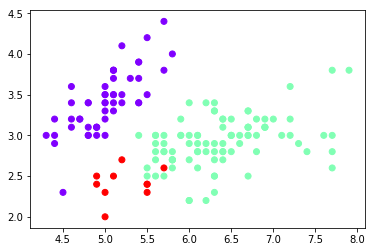

In [86]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow');
print("DBScan Clustering")
plt.show()